In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
file = pd.read_excel("Rating_Book.xlsx")
file

,Unnamed: 0,Star Ratings,Short Review,Full Review
0,0,1,-,Not good don't buy
1,1,4,Utterly Disappointed,very good
2,2,5,Best in the market!,wow wow wow....as expected with this you shoul...
3,3,5,Just wow!,Amazing Product with new features like Selfie....
4,4,5,Very poor,Not multy propse only selfi stick
...,...,...,...,...
20204,157,4,Delightful,Overall good phone\nPros\nSmooth display\nCall...
20205,158,4,Wonderful,Good product and it's performance
20206,159,5,Great product,Best phone 5 star best for gaming and video\nB...
20207,160,5,Perfect product!,Vivo v25 phone looking awesome ðŸ‘


In [3]:
file.isna().sum()

Unnamed: 0       0
Star Ratings     1
Short Review    11
Full Review      1
dtype: int64

In [4]:
file['Star Ratings'].value_counts()

5    12240
4     2199
2     1996
1     1979
3     1764
-       30
Name: Star Ratings, dtype: int64

In [5]:
file['Star Ratings'].replace("-",3 , inplace =True)

In [6]:
file['Star Ratings'].value_counts()

5.0    12240
4.0     2199
2.0     1996
1.0     1979
3.0     1794
Name: Star Ratings, dtype: int64

In [7]:
file.drop([20208], axis=0, inplace=True)
file

,Unnamed: 0,Star Ratings,Short Review,Full Review
0,0,1.0,-,Not good don't buy
1,1,4.0,Utterly Disappointed,very good
2,2,5.0,Best in the market!,wow wow wow....as expected with this you shoul...
3,3,5.0,Just wow!,Amazing Product with new features like Selfie....
4,4,5.0,Very poor,Not multy propse only selfi stick
...,...,...,...,...
20203,156,4.0,Delightful,It is a good phone according to the amount of ...
20204,157,4.0,Delightful,Overall good phone\nPros\nSmooth display\nCall...
20205,158,4.0,Wonderful,Good product and it's performance
20206,159,5.0,Great product,Best phone 5 star best for gaming and video\nB...


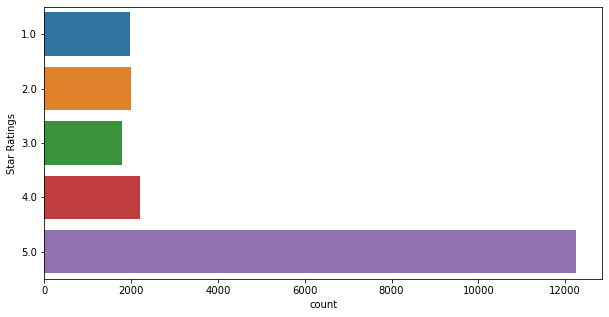

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y = file['Star Ratings'])
plt.show()

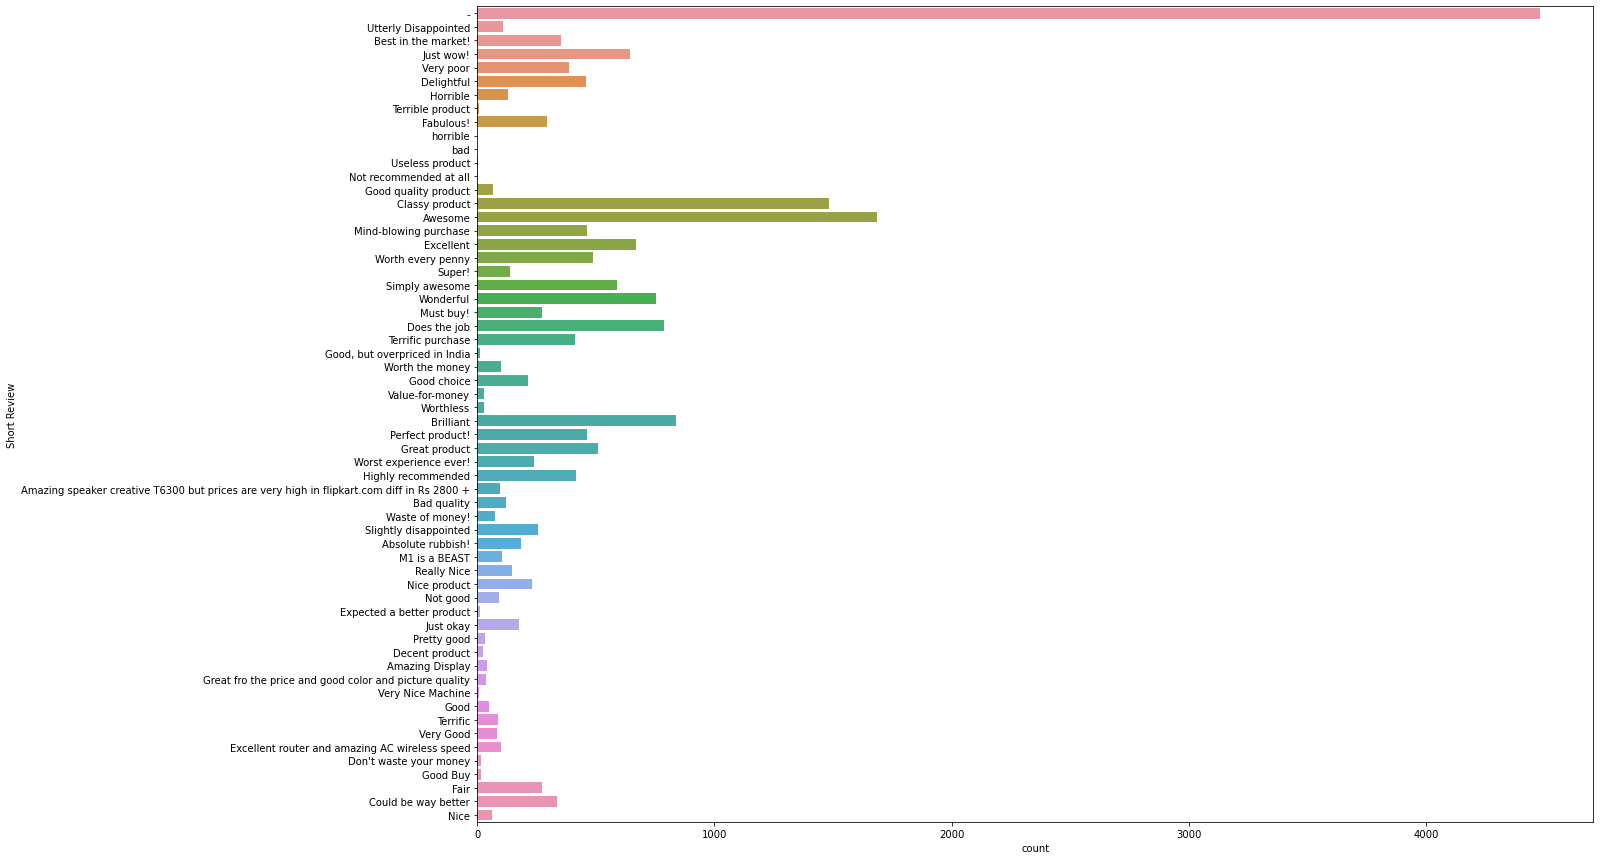

In [10]:
plt.figure(figsize=(20,15))
sns.countplot(y = file['Short Review'])
plt.show()

In [11]:
file.drop(['Unnamed: 0'], axis = 1 ,inplace = True)
file

,Star Ratings,Short Review,Full Review
0,1.0,-,Not good don't buy
1,4.0,Utterly Disappointed,very good
2,5.0,Best in the market!,wow wow wow....as expected with this you shoul...
3,5.0,Just wow!,Amazing Product with new features like Selfie....
4,5.0,Very poor,Not multy propse only selfi stick
...,...,...,...
20203,4.0,Delightful,It is a good phone according to the amount of ...
20204,4.0,Delightful,Overall good phone\nPros\nSmooth display\nCall...
20205,4.0,Wonderful,Good product and it's performance
20206,5.0,Great product,Best phone 5 star best for gaming and video\nB...


In [12]:
X=file['Full Review']
y=file['Star Ratings']

In [13]:
print(X,y)

0                                       Not good don't buy
1                                                very good
2        wow wow wow....as expected with this you shoul...
3        Amazing Product with new features like Selfie....
4                        Not multy propse only selfi stick
                               ...                        
20203    It is a good phone according to the amount of ...
20204    Overall good phone\nPros\nSmooth display\nCall...
20205                    Good product and it's performance
20206    Best phone 5 star best for gaming and video\nB...
20207                  Vivo v25 phone looking awesome ðŸ‘
Name: Full Review, Length: 20208, dtype: object 0        1.0
1        4.0
2        5.0
3        5.0
4        5.0
        ... 
20203    4.0
20204    4.0
20205    4.0
20206    5.0
20207    5.0
Name: Star Ratings, Length: 20208, dtype: float64


In [14]:
X_train,X_test,y_train,y_test =train_test_split(X,y, train_size=0.7, random_state=1, shuffle =True)

In [15]:
print(X_train ,y_train)

17423                                             damaged 
15809                                      quality problem
15346    Excellent touch response nice performance good...
16592                                      quality problem
4642                                       damaged product
                               ...                        
10955                  This monitor is good but it's small
17289    Overall decent phone for lowrange price, what ...
5192     Its a vintage looking speaker with good batter...
12172    Print quality in awasome and easily id photo c...
235      Happy with the product and the video quality i...
Name: Full Review, Length: 14145, dtype: object 17423    1.0
15809    1.0
15346    5.0
16592    2.0
4642     1.0
        ... 
10955    3.0
17289    3.0
5192     5.0
12172    5.0
235      5.0
Name: Star Ratings, Length: 14145, dtype: float64


In [16]:
tokenizer =Tokenizer()
tokenizer.fit_on_texts(X_train)

In [17]:
tokenizer.word_index

{'is': 1,
 'good': 2,
 'and': 3,
 'the': 4,
 'quality': 5,
 'this': 6,
 'product': 7,
 'very': 8,
 'i': 9,
 'for': 10,
 'a': 11,
 'not': 12,
 'sound': 13,
 'it': 14,
 'in': 15,
 'with': 16,
 'to': 17,
 'boat': 18,
 'boult': 19,
 'camera': 20,
 'awesome': 21,
 'design': 22,
 'phone': 23,
 'battery': 24,
 'have': 25,
 'nice': 26,
 'of': 27,
 'best': 28,
 'but': 29,
 '2': 30,
 'bass': 31,
 'review': 32,
 'price': 33,
 'you': 34,
 '1': 35,
 'from': 36,
 'used': 37,
 'performance': 38,
 'experience': 39,
 'gives': 40,
 'than': 41,
 'writing': 42,
 'superb': 43,
 'great': 44,
 'as': 45,
 'so': 46,
 'excellent': 47,
 'range': 48,
 "it's": 49,
 'probass': 50,
 'vs': 51,
 'reckerz': 52,
 '225': 53,
 'both': 54,
 'surround': 55,
 'whereas': 56,
 'rockerz': 57,
 'exp': 58,
 'money': 59,
 'also': 60,
 'no': 61,
 'happy': 62,
 'damaged': 63,
 'flipkart': 64,
 'am': 65,
 'mobile': 66,
 'its': 67,
 'delivery': 68,
 'after': 69,
 'value': 70,
 'really': 71,
 'display': 72,
 'was': 73,
 'overall': 74,


In [18]:
len(tokenizer.word_index)

1229

In [19]:
def get_sequences(texts , tokenizer , train= True , max_seq_length= None):
    sequences =tokenizer.texts_to_sequences(texts)
    
    if train == True:
        max_seq_length =np.max(list(map(len , sequences)))
        
    sequences =pad_sequences(sequences,maxlen = max_seq_length , padding ='post')
    
    return sequences

In [20]:
def preprocess_inputs(file):
    file = file.copy()
    
    X=file['Full Review']
    y=file['Star Ratings']
    
    X_train,X_test,y_train,y_test =train_test_split(X,y, train_size=0.7, random_state=1, shuffle =True)
    
    
    tokenizer =Tokenizer()
    tokenizer.fit_on_texts(X_train)
    print('length',len(tokenizer.word_index) +1 )
    
    X_train = get_sequences(X_train , tokenizer , train =True)
    X_test =  get_sequences(X_test , tokenizer , train = False , max_seq_length= X_train.shape[1])
    
    return X_train, X_test, y_train , y_test ,tokenizer

In [21]:
X_train,X_test,y_train,y_test, t =preprocess_inputs(file)

length 1230


In [22]:
print(X_train , y_train)

[[ 63   0   0 ...   0   0   0]
 [  5  85   0 ...   0   0   0]
 [ 47 193 224 ...   0   0   0]
 ...
 [ 67  11 384 ...   0   0   0]
 [ 90   5  15 ...   0   0   0]
 [ 62  16   4 ...   0   0   0]] 17423    1.0
15809    1.0
15346    5.0
16592    2.0
4642     1.0
        ... 
10955    3.0
17289    3.0
5192     5.0
12172    5.0
235      5.0
Name: Star Ratings, Length: 14145, dtype: float64


In [23]:
X_train.shape

(14145, 35)

In [24]:
inputs =tf.keras.Input(shape=(35,))
X = tf.keras.layers.Embedding(
    input_dim =1230,
    output_dim =30
)(inputs)

In [25]:
inputs

<KerasTensor: shape=(None, 35) dtype=float32 (created by layer 'input_1')>

In [26]:
X

<KerasTensor: shape=(None, 35, 30) dtype=float32 (created by layer 'embedding')>

In [27]:
X =tf.keras.layers.Flatten()(X)

In [28]:
X

<KerasTensor: shape=(None, 1050) dtype=float32 (created by layer 'flatten')>

In [29]:
X =tf.keras.layers.Dense(40, activation ='relu')(X)
X =tf.keras.layers.Dense(40, activation ='relu')(X)
outputs =tf.keras.layers.Dense(1, activation ='linear')(X)

In [30]:
model =tf.keras.Model(inputs =inputs , outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

In [31]:
history =model.fit(X_train,y_train, validation_split=0.2, batch_size=10,epochs=50,
                    callbacks =[
                        tf.keras.callbacks.EarlyStopping(
                        monitor ='val_loss',
                        patience =1,
                        restore_best_weights =True)
                    ])

Epoch 1/50
1132/1132 [==============================] - 24s 17ms/step - loss: 0.5991 - val_loss: 0.1755
Epoch 2/50
1132/1132 [==============================] - 18s 16ms/step - loss: 0.1400 - val_loss: 0.1487
Epoch 3/50
1132/1132 [==============================] - 19s 17ms/step - loss: 0.1348 - val_loss: 0.1394
Epoch 4/50
1132/1132 [==============================] - 18s 16ms/step - loss: 0.1298 - val_loss: 0.1584


In [32]:
y_pred =np.squeeze(model.predict(X_test))

rmse = np.sqrt(np.mean((y_test - y_pred)**2))

print("RMSE: {: .2f}".format(rmse))

190/190 [==============================] - 3s 13ms/step
RMSE:  0.36
